Exam Number - B238542
How do different distribution channels (DC) impact revenue?

DCs have a critical impact on hotel revenue, guiding marketing strategies, customer targeting, and profitability. In a competitive market, knowing which channels yield higher revenue can guide investments and operational focus.  

Chosen attributes:
Country: Differentiates market performance geographically.
Repeated guests: Highlight customer loyalties and recurring revenue. 
ADR: Direct measure of revenue per night. 
Meal type: Reflects service levels and upsell potential.
Arrival date months: Captures seasonal trends and booking fluctuations. 
Duration of stay: Impacts overall revenue per booking. 

Findings: 
In August, the busiest month, the Travel Agent channel contributed the most, accounting for 84.6% of bookings. This trend holds throughout the year, with Travel Agent driving the largest share of total revenue. Additionally, Travel Agent is the most common booking channel in Portugal, the most popular destination. 
The undefined channel shows the highest average duration of stay, though this is biased by a single booking. 
The corporate channel records the highest percentage of repeated guests. 
Travel Agent and Direct channels exhibit high variance of ADR per booking, while Global Distribution has the highest average ADR. 

Overall, Travel Agent channels drive the highest revenue, followed by Corporate and Direct channels. Global Distribution generates less than all three, while undefined channels are negligible due to limited booking. 

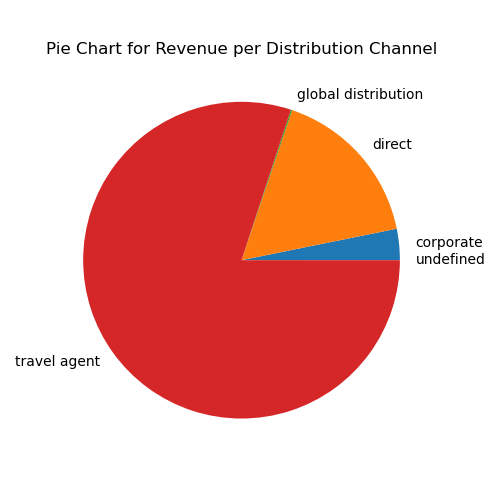

Overall mark: 63

#### Business Question:
The business question is clearly stated and is well connected to the given dataset. The significance of answering such a question is explained. Comprehensive evidences are presented to derive the finings. However, implications and actionable advices are insufficient.

<u>Very Good</u>

#### Data:
Multiple variables are selected to answer the question. The meaning of those variables are provided and the rational of choosing them is clearly addressed. Effective data filtering and variable transformation are used, showing good skill of data manipulation.

<u>Very Good</u>

#### Visualization:
A combination of meaningful plots are presented for the visualization purpose, though some of them are not informative enough. Essential elements of titles, labels are not always availabel. Improvements could include replacing the scatter plot with box plot which can be more informative and adding annotations for the pie chart that shows the percentages.

<u>Good</u>

#### Code:
The code is error-free and the structure is clean overall. Comments are available along with the code. For better readability, it is adviced to suppress some exploratory code (e.g. df.columns, df['adr'].plot() and etc) that does not contribute to the analysis.

<u>Good</u>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("hotel_bookings.csv")

In [3]:
#Analyse all columns
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [4]:
#Filter only relevent columns 
df = df[['distribution_channel', 'is_canceled', 'country', 'stays_in_week_nights', 'stays_in_weekend_nights', 'is_repeated_guest', 'adr', 'meal', 'arrival_date_month']]
print(df.head())

  distribution_channel  is_canceled country  stays_in_week_nights  \
0               Direct          0.0     PRT                     0   
1               Direct          0.0     PRT                     0   
2               Direct          0.0     GBR                     1   
3            Corporate          0.0     GBR                     1   
4         Travel Agent          0.0     GBR                     2   

   stays_in_weekend_nights  is_repeated_guest   adr meal arrival_date_month  
0                        0                  0   0.0   BB               July  
1                        0                  0   0.0   BB               July  
2                        0                  0  75.0   BB               July  
3                        0                  0  75.0   BB               July  
4                        0                  0  98.0   BB               July  


In [5]:
#Clean data
#Combine travel agents
df['distribution_channel'] = df['distribution_channel'].str.strip().str.lower() 
#Find total stay
df['total_nights'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
#Remove cancelled bookings (does not impact revenue)
df = df[df['is_canceled'] == 0]
df = df[df['total_nights'] > 0]
#ADR must be more than zero 
df = df[df['adr'] > 0]
#Calculate total revenue per stay
df['total_revenue_per_stay'] = df['adr'] * df['total_nights']
#Drop columns we now don't need
df.drop(columns=['stays_in_week_nights', 'stays_in_weekend_nights'], inplace=True)

In [6]:
print(df.head())

  distribution_channel  is_canceled country  is_repeated_guest    adr meal  \
2               direct          0.0     GBR                  0   75.0   BB   
3            corporate          0.0     GBR                  0   75.0   BB   
4         travel agent          0.0     GBR                  0   98.0   BB   
5         travel agent          0.0     GBR                  0   98.0   BB   
6               direct          0.0     PRT                  0  107.0   BB   

  arrival_date_month  total_nights  total_revenue_per_stay  
2               July             1                    75.0  
3               July             1                    75.0  
4               July             2                   196.0  
5               July             2                   196.0  
6               July             2                   214.0  


In [7]:
df.describe()

,is_canceled,is_repeated_guest,adr,total_nights,total_revenue_per_stay
count,73414.0,73414.000000,73414.000000,73414.000000,73414.000000
mean,0.0,0.037377,102.365042,3.435762,354.065975
std,0.0,0.189685,47.276995,2.542405,322.178064
min,0.0,0.000000,0.260000,1.000000,1.000000
25%,0.0,0.000000,70.000000,2.000000,147.000000
50%,0.0,0.000000,94.500000,3.000000,264.600000
75%,0.0,0.000000,126.000000,4.000000,446.400000
max,0.0,1.000000,510.000000,69.000000,7590.000000


<Axes: >

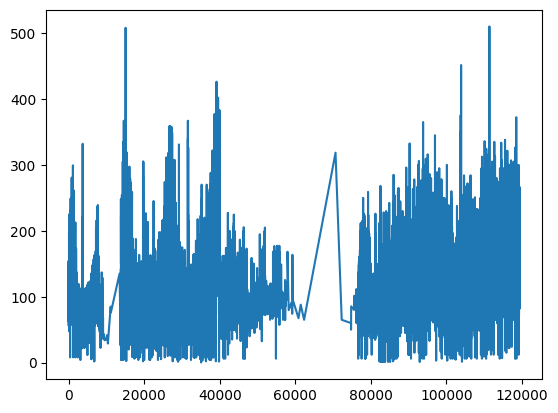

In [8]:
df['adr'].plot()
#Plot to visualise if data looks accurate and reliable before performing analysis 

In [9]:
print(df['country'].unique())

['GBR' 'PRT' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'JAM' 'HRV' 'IRN' 'CAF'
 'CYP' 'NZL' 'IDN' 'KAZ' 'THA' 'COL' 'DOM' 'MKD' 'MYS' 'NGA' 'VEN' 'GIB'
 'ARM' 'JPN' 'LKA' 'CUB' 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV'
 'JOR' 'SYR' 'PHL' 'SGP' 'BDI' 'AGO' 'URY' 'SAU' 'KWT' 'LBN' 'AND' 'VNM'
 'AZE' 'PLW' 'ARE' 'EGY' 'PER' 'SVK' 'MDV' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL'
 'UZB' 'NPL' 'BHS' 'PAK' 'MAC' 'TGO' 'TWN' 'HKG' 'DJI' 'GEO' 'TUN' 'STP'
 'SEN' 'KNA' 'ETH' 'IRQ' 'RWA' 'LIE' 'MMR' 'PAN' 'TMP' 'BFA' 'KEN' 'MCO'
 'LBY' 'GNB' 'MLI' 'BGD' 'TZA' 'BHR' 'NAM' 'BOL' 'SYC' 'QAT' 'PRY' 'BRB'
 'ABW' 'AIA' 'SLV' 'DMA' 'GAB' 'PYF' 'GUY' 'LCA' 'ATA' 'MNE' 'GTM' 'GHA'
 'ASM' 'MRT' 'NCL' 'KIR' 'SDN' 'ATF' 'TJK' 'SLE' 'LAO'

In [10]:
#Find country with the most bookings
country_counts = df['country'].value_counts()
top_country = country_counts.idxmax()
print("Country with the most hotel bookings: ", top_country)
print("Number of bookings: ", country_counts.max())

Country with the most hotel bookings:  PRT
Number of bookings:  19707


In [11]:
#Find distribution channel which brings in most bookings from Portugal
df_PRT = df[df['country'] == 'PRT']
distribution_channel_counts = df_PRT['distribution_channel'].value_counts()
print("Bookings by channel for Portugal (PRT): ")
print(distribution_channel_counts)

Bookings by channel for Portugal (PRT): 
distribution_channel
travel agent           11735
direct                  4865
corporate               3091
global distribution       15
undefined                  1
Name: count, dtype: int64


In [12]:
#Make data frame for revenue
df_revenue = df.groupby('distribution_channel', as_index=False).agg({'total_revenue_per_stay': 'sum', 'total_nights' : 'count'})
df_revenue.rename(columns={'total_revenue_per_stay': 'total_revenue_per_channel'}, inplace = True)
df_revenue.rename(columns={'total_nights': 'total_bookings'}, inplace = True)
df_revenue

,distribution_channel,total_revenue_per_channel,total_bookings
0,corporate,827884.92,5037
1,direct,4325305.48,11381
2,global distribution,33007.96,152
3,travel agent,20806637.65,56843
4,undefined,563.50,1


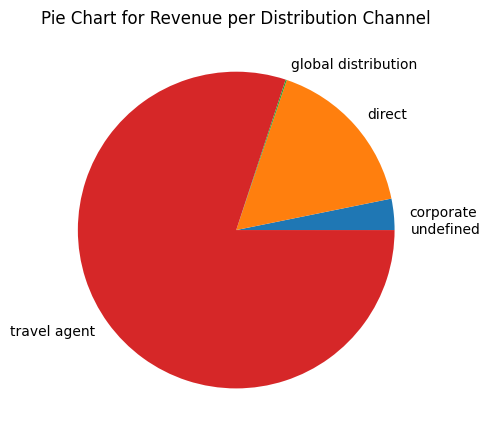

In [13]:
#Create pie chart for revenue per distribution channel
plt.figure(figsize=(5,5))
plt.pie(df_revenue['total_revenue_per_channel'], labels=df_revenue['distribution_channel'])
plt.title('Pie Chart for Revenue per Distribution Channel')
#plt.legend()
plt.tight_layout()
plt.savefig("pie_chart.png", dpi=100)
plt.show()

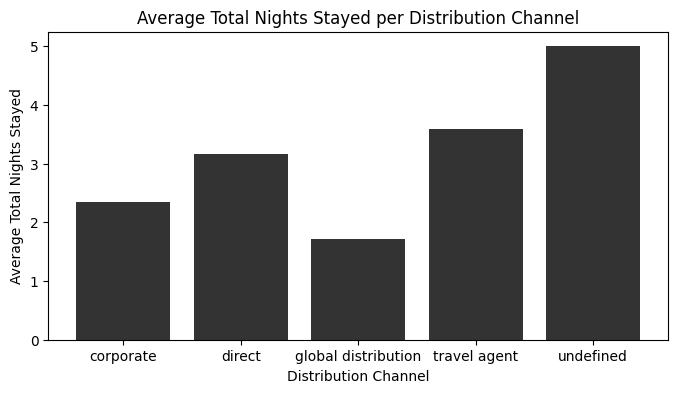

In [14]:
#Create bar chart for average nights per distribution channel
avg_total_nights = df.groupby('distribution_channel', as_index = False)['total_nights'].mean()
plt.figure(figsize=(8,4))
plt.bar(avg_total_nights['distribution_channel'], avg_total_nights['total_nights'], color='black', alpha=0.8)
plt.xlabel("Distribution Channel")
plt.ylabel("Average Total Nights Stayed")
plt.title("Average Total Nights Stayed per Distribution Channel")
plt.show()
#Undefined channel is skewed with limited bookings 

In [15]:
#Find percentage of guests which are repeated per distribution channel
total_guests = df.groupby('distribution_channel').size()
repeated_guests = df[df['is_repeated_guest'] == 1].groupby('distribution_channel').size()
percentage_of_guests_which_are_repeated = (repeated_guests/total_guests)*100
print(percentage_of_guests_which_are_repeated)

distribution_channel
corporate              27.397260
direct                  5.544328
global distribution     1.315789
travel agent            1.285998
undefined                    NaN
dtype: float64


In [16]:
#Make data frame with distribution channels & ADR
df.loc[:, 'row_number'] = df.groupby('distribution_channel').cumcount()
pivot_df = df.pivot(index='row_number', columns='distribution_channel', values='adr')
print(pivot_df)

distribution_channel  corporate  direct  global distribution  travel agent  \
row_number                                                                   
0                         75.00   75.00                120.0         98.00   
1                        107.42  107.00                 75.0         98.00   
2                        104.72  103.00                 87.0        145.00   
3                        100.00  153.00                 87.0         97.00   
4                        114.00   84.67                 84.0        154.77   
...                         ...     ...                  ...           ...   
56838                       NaN     NaN                  NaN         96.14   
56839                       NaN     NaN                  NaN        225.43   
56840                       NaN     NaN                  NaN        157.71   
56841                       NaN     NaN                  NaN        104.40   
56842                       NaN     NaN                  NaN    

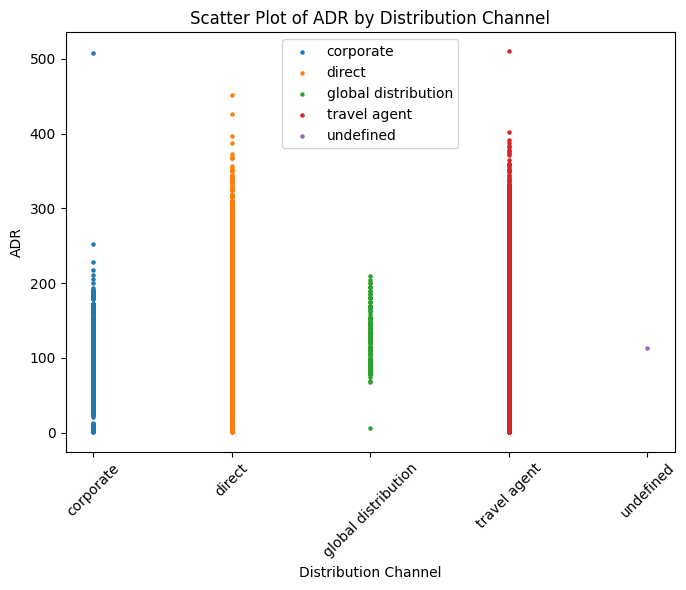

In [17]:
#Create scatter plot of ADR by distribution channel to show variance of ADR per distribution channel
plt.figure(figsize=(7,6))
for channel in pivot_df.columns:
    y_vals = pivot_df[channel].dropna()
    x_pos = [pivot_df.columns.get_loc(channel)]*len(y_vals)
    plt.scatter(x_pos, y_vals,s =5, label=channel)
plt.xticks(range(len(pivot_df.columns)), pivot_df.columns, rotation=45)
plt.xlabel("Distribution Channel")
plt.ylabel("ADR")
plt.title("Scatter Plot of ADR by Distribution Channel")
plt.legend()
plt.tight_layout()
plt.show()

In [18]:
#Calculate average ADR per distribution channel
df_avg_adr = df.groupby('distribution_channel', as_index=False)['adr'].mean()
df_avg_adr.rename(columns={'adr':'avg_adr'}, inplace=True)
print(df_avg_adr)

  distribution_channel     avg_adr
0            corporate   69.464215
1               direct  112.626402
2  global distribution  123.089605
3         travel agent  103.170355
4            undefined  112.700000


In [19]:
#Create a function to return the most common meal type per distribution channel
distribution_channel_meal_counts = df.groupby('distribution_channel')['meal'].value_counts()
def most_common(x):
    return x.value_counts().idxmax()

mode_meal_per_channel = df.groupby('distribution_channel')['meal'].agg(most_common)
print("Most common meal type per distribution channel: ")
print(mode_meal_per_channel)
#Results consistant accross channels, no clear patterns or trends emerging. Suggests that meal type preferneces may not vary accross distribution channels.

Most common meal type per distribution channel: 
distribution_channel
corporate              BB
direct                 BB
global distribution    BB
travel agent           BB
undefined              HB
Name: meal, dtype: object


In [20]:
#Find how many bookings each distribution channel had per month 
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'Spetember', 'October', 'November', 'December']
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=month_order, ordered=True)
distribution_channel_month_count = df.groupby(['arrival_date_month', 'distribution_channel'], observed=True).size().unstack(fill_value=0)
print(distribution_channel_month_count)

distribution_channel  corporate  direct  global distribution  travel agent  \
arrival_date_month                                                           
January                     376     865                   15          2750   
February                    422    1005                   18          3800   
March                       541    1001                   15          4942   
April                       344     938                    7          5155   
May                         444     871                   18          5617   
June                        380     843                   25          5044   
July                        234    1241                    4          6283   
August                      180    1532                    3          6761   
October                     798     896                   16          5007   
November                    676     591                   16          3246   
December                    301     784                    7    